In [70]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
%matplotlib inline

In [71]:
train = pickle.load(open("../pickles/train_data.p",'rb'))
test = pickle.load(open("../pickles/test_data.p",'rb'))
target = pickle.load(open("../pickles/target.p",'rb'))
test_id = pd.read_csv("input/test.csv",usecols=["Id"])

print(train.shape)

(1456, 248)


In [72]:
from sklearn.decomposition import PCA

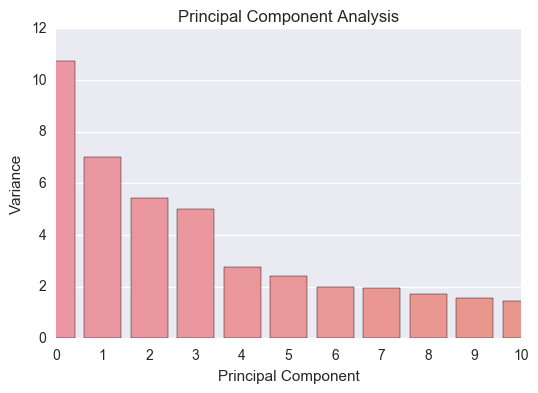

In [73]:
pca = PCA()
pca.fit(train)
train = pca.transform(train)
train = pd.DataFrame(train)
train = train.iloc[:,0:10]
test_transformed = pca.transform(test)
test_transformed = pd.DataFrame(test_transformed)
test_transformed =  new_test.iloc[:,0:10]
sns.barplot(list(range(pca.explained_variance_.shape[0])),np.log1p(pca.explained_variance_))
sns.plt.xlim(0,10)
sns.plt.xlabel("Principal Component")
sns.plt.ylabel("Variance")
sns.plt.title("Principal Component Analysis")

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(train,target)
predict =  model.predict(test_transformed)
final = pd.DataFrame()
final["Id"] = test_id
final["SalePrice"] = abs(predict)
final.to_csv("../results/pca.csv",index=False)